In [33]:
#importing all important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


**Reading the data and understanding its structure**


In [54]:
data = pd.read_csv("iris.data", index_col=False, names = ["sepal length in cm","sepal width in cm","petal length in cm","petal width in cm","Type"])

In [55]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
data.describe()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [57]:
data.shape

(150, 5)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   Type                150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


**Converting object variable to numerical value**


In [59]:
#Iris Setosa = 0
#Iris Versicolour = 1
#Iris Virginica = 2
data.Type.replace(to_replace=["Iris-setosa","Iris-versicolor","Iris-virginica"],value=["0","1","2"],regex=True,inplace=True)

In [60]:
data[["Type"]]=data[["Type"]].astype(int)

In [61]:
data.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,Type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sepal length in cm  150 non-null    float64
 1   sepal width in cm   150 non-null    float64
 2   petal length in cm  150 non-null    float64
 3   petal width in cm   150 non-null    float64
 4   Type                150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [63]:
data.isna().any()

sepal length in cm    False
sepal width in cm     False
petal length in cm    False
petal width in cm     False
Type                  False
dtype: bool

**Data Visualization**

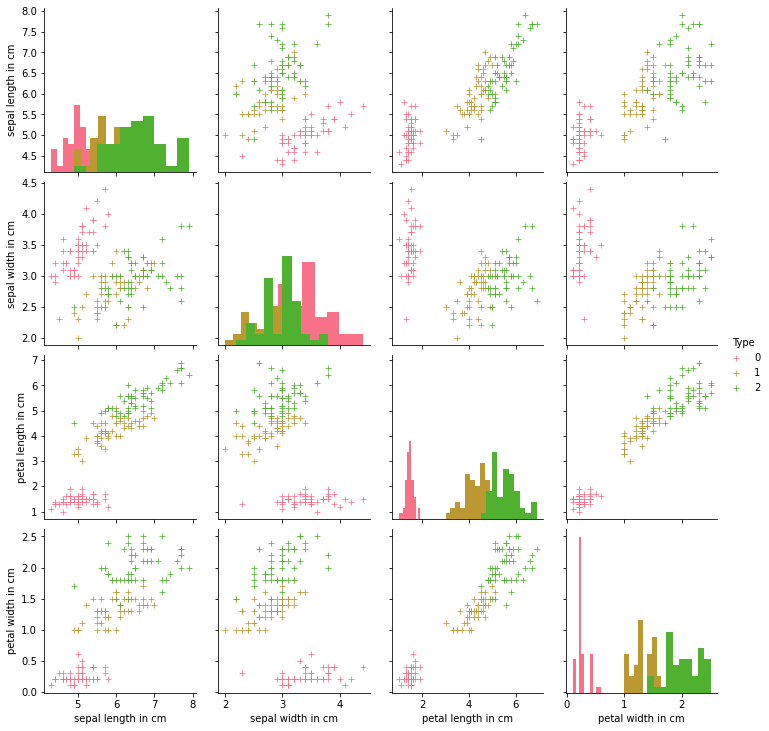

In [65]:
g = sns.pairplot(data,diag_kind = 'hist',hue="Type",markers='+')
plt.show()

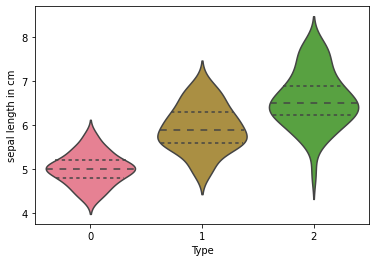

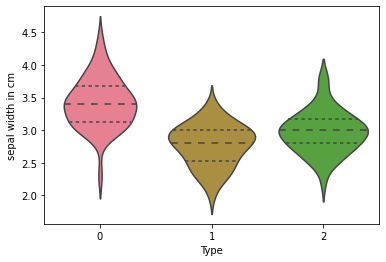

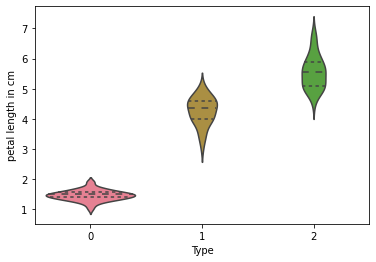

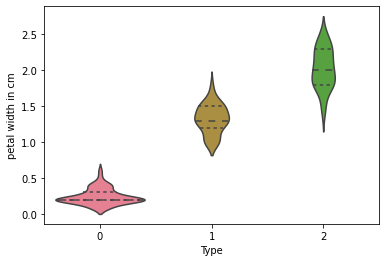

In [73]:
g = sns.violinplot(x='Type', y='sepal length in cm', data=data, scale="width", inner='quartile')
plt.show()
g = sns.violinplot(x='Type', y='sepal width in cm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(x='Type', y='petal length in cm', data=data, inner='quartile')
plt.show()
g = sns.violinplot(x='Type', y='petal width in cm', data=data, inner='quartile')
plt.show()


In [82]:
y = data['Type']
X = data.drop(["Type"],axis=1)
print(X.shape)
print(y.shape)

(150, 4)
(150,)


**Fitting and prediction**

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(90, 4)
(90,)
(60, 4)
(60,)


In [85]:
k_range = list(range(1,26))
acc_score = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc_score.append(metrics.accuracy_score(y_pred,y_test))
    


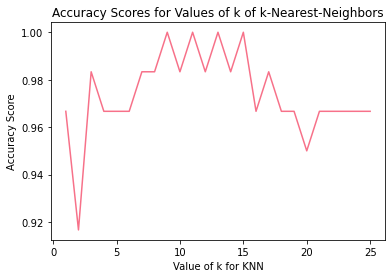

In [86]:
plt.plot(k_range, acc_score)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [87]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))


0.9833333333333333


In [88]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

array([1])